https://arxiv.org/pdf/1601.01754.pdf

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from math import *

class ACDual:
    def __init__(self, real, dual):
        self.real = real
        self.dual = dual
    
    @classmethod
    def FromPt(cls,pt):
        C = pt[0]+pt[1]*complex('j')
        return cls(complex(1.0),C)

    @classmethod
    def RotateAngle(cls,theta):
        ''' returns a ACDual for the rotation by theta
            system is cos(theta/2) i*sin(theta/2) because its a double cover
        '''
        
        c = cos(theta/2)
        s = sin(theta/2)
        return cls(c+s*complex('j'),0)

    @classmethod
    def Translate(cls,D):
        ''' returns a ACDual for the translation by D
            system is 1, 0*i, D[]0]/2 e ,D[1] i*e because its a double cover
        '''
        return cls(complex(1.0),D[0]/2+D[1]/2*complex('j'))
    
    @classmethod
    def RotateAroundPoint(cls,theta,D):
        """Performs t(D)*R*T(D)inv to move the rotation point to the origin, rotate at the origin and then translate back"""
        T = cls.Translate(D)
        Tinv = cls.Translate([-D[0],-D[1]])
        R = cls.RotateAngle(theta)
        return T*R*Tinv
        
    def __toDual(self,other):
        '''private function to convert numbers into ACDuals, '''
        if isinstance(other, ACDual): return other
        if isinstance(other,complex):return ACDual(other,0)
        return ACDual(complex(other),0)
        
        
    def __add__(self, other1):
        other = self.__toDual(other1)
        return ACDual(self.real + other.real,
                      self.dual + other.dual)
    __radd__ = __add__

    def __sub__(self, other1):
        other = self.__toDual(other1)
        return ACDual(self.real - other.real,
                          self.dual - other.dual)

    def __rsub__(self, other):
        return ACDual(other, 0) - self

    def __truediv__(self, other1):
        ''
        other = self.__toDual(other1)
        return ACDual(self.real/other.real,
                     (self.dual*other.real - self.real*other.dual)/(other.real**2))

    def __rtruediv__(self, other1):
        other = self.__toDual(other1)
        return other/self

    def __pow__(self, other):
        return ACDual(self.real**other,
                          self.dual * other * self.real**(other - 1))

    def involution(self):
        return ACDual(self.real.conjugate(),self.dual)
    
    def __mul__(self, other1):
        other = self.__toDual(other1)
        return ACDual(self.real * other.real,
                      self.dual * other.real.conjugate() + self.real * other.dual)
    __rmul__ = __mul__
    
    def mag(self):
        return sqrt(self.real*self.real.conjugate())
    
    def __matmul__(self,other):
        return self*other*self.involution()
    
    def __rmatmul(self,other):
        return other*self*other.involution()
    
    def asPt(self):
        '''returns the XY point the dual component represents'''
        C = self.dual
        return C.real,C.imag
    
    def __repr__(self):
        return repr(self.real) + ' + ' + repr(self.dual) + '*'+'\u03B5'

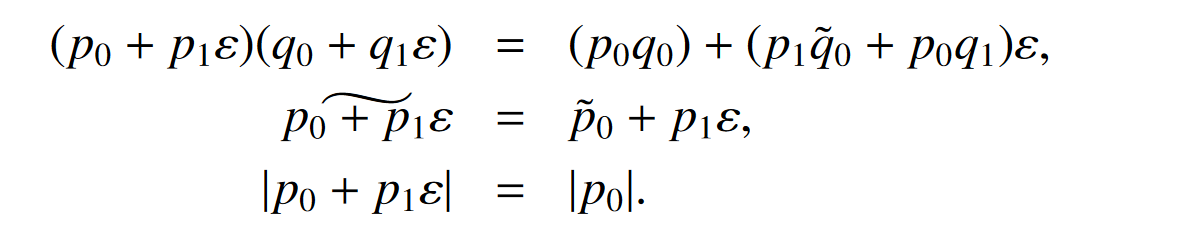

In [5]:
theta = np.pi/2
P_start = (10,0)
P_rot = (15,0)

P = ACDual.FromPt(P_start)
D = np.array(P_rot)

T = ACDual.Translate(D)
Tinv = ACDual.Translate(-D)
R = ACDual.RotateAngle(theta)
print((T@(R@(Tinv@P))).asPt())

AboutD = ACDual.RotateAroundPoint(theta,D)

P_end = (AboutD@P).asPt()
print(P_end)

(15.000000000000004, -5.000000000000001)
(15.000000000000004, -5.0)


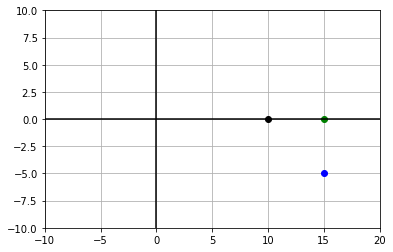

In [6]:
fig, ax = plt.subplots()
ax.plot(P_start[0],P_start[1],"ko")
ax.plot(P_rot[0],P_rot[1],"go")
ax.plot(P_end[0],P_end[1],"bo")
#plt.axis('equal')
ax.grid()
ax.set_xlim(-10,20)
ax.set_ylim(-10,10)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()